In [2]:
import numpy as np
import matplotlib.pyplot as plt

import os

In [3]:
import utils.pluto_utils as pluto
import utils.reynolds as rey
import utils.probabilities as probs
from utils.visualise import animate_vars

# Load data

In [4]:
output_dir = "/home/yangelaxue/Documents/VUW/pluto_runs/Orszag_Tang/"
save_dir = os.path.join(output_dir,'visualisation/')

if not os.path.exists(save_dir):
    os.mkdir(save_dir)

In [5]:
f_names = pluto.get_HDF5names(output_dir)
X, Y, Z = pluto.load_HDF5data(os.path.join(output_dir,f_names[0]), 'X', 'Y', 'Z')
rho = np.array([pluto.load_HDF5data(os.path.join(output_dir,f_name), 'rho')[0] for f_name in f_names])
prs = np.array([pluto.load_HDF5data(os.path.join(output_dir,f_name), 'prs')[0] for f_name in f_names])
vx1 = np.array([pluto.load_HDF5data(os.path.join(output_dir,f_name), 'vx1')[0] for f_name in f_names])
vx2 = np.array([pluto.load_HDF5data(os.path.join(output_dir,f_name), 'vx2')[0] for f_name in f_names])
vx3 = np.array([pluto.load_HDF5data(os.path.join(output_dir,f_name), 'vx3')[0] for f_name in f_names])
times = pluto.get_times(output_dir)

In [6]:
len(times)

201

In [7]:
v = [vx1, vx2, vx3]

In [8]:
def get_pdf(vals,times=None,nbins=10):

    # TODO:
    
    try:
        if not times:
            times = np.arange(len(vals))
    except:
        pass

    bins = np.linspace(vals.min(),vals.max(),nbins+1)

    pdf = np.zeros((nbins,*vals[0].shape))
    # print

    # print(len(bins))
    # print(vals.min(),vals.max())
    
    for i in range(nbins):
        # print(i,bins[i], bins[i+1])
        # print()
        for j,val in enumerate(vals[:-1]):
            # if i==0:
            #     print(j, ((bins[i]<=val)*(val<bins[i+1])))
                       
            where = np.where(((bins[i]<=val)*(val<bins[i+1])))
            # if i==0:
            #     print(where)
            pdf[i][where] += times[j+1]-times[j]
    
    pdf /= times[-1]-times[0]

    return bins, pdf

In [9]:
bins, B = get_pdf(vx1,times,30)

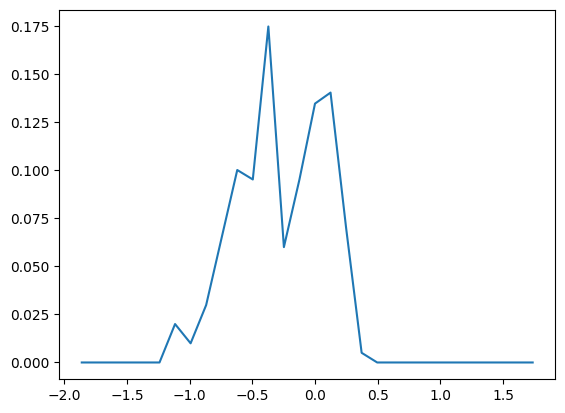

In [10]:
plt.plot(bins[:-1], B[:,128,128])

plt.show()

# bins, 

In [11]:
B[:,100,128].sum()

np.float64(1.0)

# Reynold's Decomposition

In [114]:
if X.ndim==3:
    dxdydz = ((X.max()-X.min())/X.shape[0],(Y.max()-Y.min())/Y.shape[1],(Z.max()-Z.min())/Z.shape[2])
    ndim = 3
else:
    dxdydz =((X.max()-X.min())/X.shape[0],(Y.max()-Y.min())/Y.shape[1])
    ndim = 2

In [115]:
t0 = 10

In [116]:
ux1 = rey.get_fluctuations(vx1,times,t0)
ux2 = rey.get_fluctuations(vx2,times,t0)

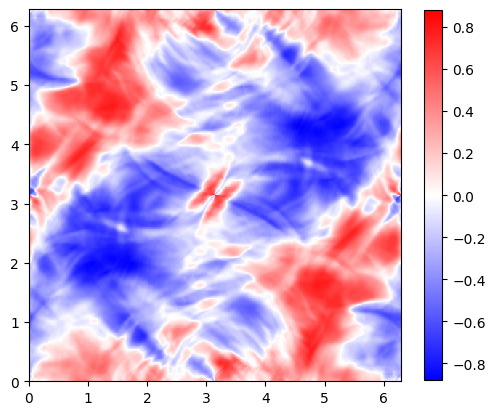

In [117]:
corr = rey.get_correlation(ux1,ux2,times)

vmax = np.abs(corr).max()

fig, ax = plt.subplots(1,1,figsize=(6,6))

ax.set_aspect("equal")

im = ax.pcolormesh(X,Y,corr,cmap='bwr',
                  vmin=-vmax,vmax=vmax
                  )

fig.colorbar(im,shrink=.8)
plt.show()

In [135]:
strain_t = np.array([rey.get_strain(vx1[timeslice],vx2[timeslice],dxdydz=dxdydz) for timeslice in range(100)])

In [147]:
# vars_t = np.array([strain[1][0] for strain in strain_t])
vmax = np.abs(vars_t).max()

In [148]:
vmax

np.float64(52.00374451202472)

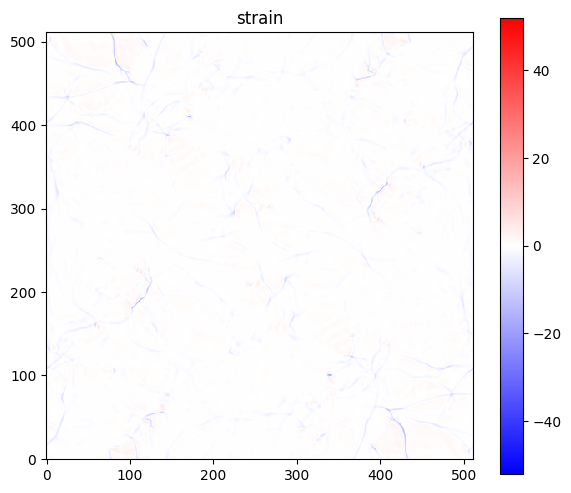

In [149]:
animate_vars(vars_t,vmin=-vmax,vmax=vmax,title='strain',save_dir=os.path.join(save_dir,'strain.mp4'),cmap='bwr')

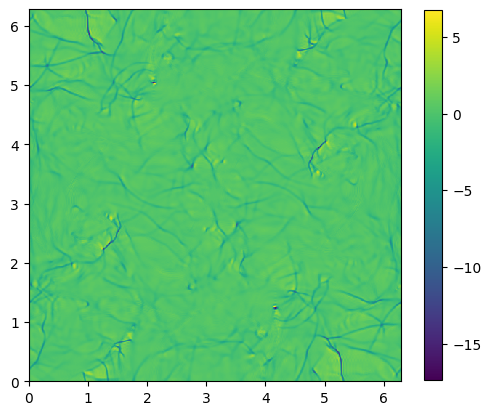

In [130]:
fig, ax = plt.subplots(1,1,figsize=(6,6))

ax.set_aspect("equal")

im = ax.pcolormesh(X,Y,strain_t[99][0][1],
                   # cmap='bwr',vmin=-vmax,vmax=vmax,
                  )

fig.colorbar(im,shrink=.8)
plt.show()

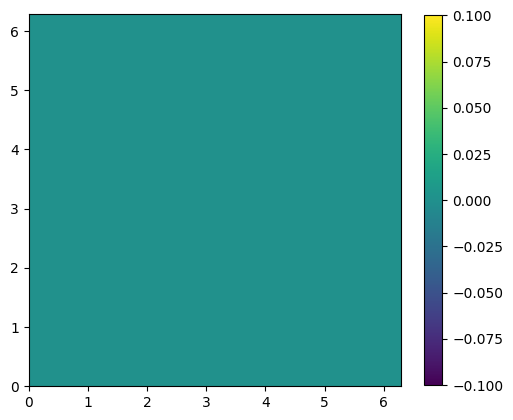

In [145]:
# timeslice = 0

# stress_t = [rey.get_stress(prs[timeslice],0,vx1[timeslice],vx2[timeslice],dxdydz=dxdydz) for timeslice in range(100)]

fig, ax = plt.subplots(1,1,figsize=(6,6))

ax.set_aspect("equal")

im = ax.pcolormesh(X,Y,stress_t[90][0][1],
                   # cmap='bwr',vmin=-vmax,vmax=vmax,
                  )

fig.colorbar(im,shrink=.8)
plt.show()

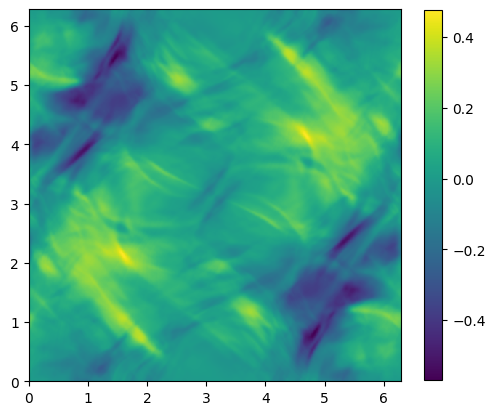

In [140]:
# stressR = [[0 for _i in range(ndim)] for _j in range(ndim)]

# for i in range(ndim):
#     for j in range(ndim):
#         stressR[i][j] = rey.get_timeaverage(-rho*ux1*ux2,times)

fig, ax = plt.subplots(1,1,figsize=(6,6))

ax.set_aspect("equal")

im = ax.pcolormesh(X,Y,stressR[0][1],
                   # cmap='bwr',vmin=-vmax,vmax=vmax,
                  )

fig.colorbar(im,shrink=.8)
plt.show()